In [17]:
from dotenv import load_dotenv
load_dotenv()
import pandas as pd
import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))
the_weeknd = 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'

artist = sp.artist(the_weeknd)
print(artist)

track_id = '7MXVkk9YMctZqd1Srtv4MB'
top_tracks = sp.artist_top_tracks(the_weeknd)
for track in top_tracks['tracks']:
    track_name = track['name']
    track_popularity = track['popularity']
    track_duration = track['duration_ms']
    print(track_name)
    print(track_popularity)
    print(track_duration / 60000)






{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'}, 'followers': {'href': None, 'total': 74127601}, 'genres': ['canadian contemporary r&b', 'canadian pop', 'pop'], 'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ', 'id': '1Xyo4u8uXC1ZmMpatF05PJ', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb214f3cf1cbe7139c1e26ffbb', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174214f3cf1cbe7139c1e26ffbb', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178214f3cf1cbe7139c1e26ffbb', 'width': 160}], 'name': 'The Weeknd', 'popularity': 92, 'type': 'artist', 'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}
Starboy
94
3.840883333333333
Die For You
90
4.33755
Popular (with Playboi Carti & Madonna) - Music from the HBO Original Series
92
3.5911
Creepin' (with The Weeknd & 21 Savage)
92
3.692
Blinding Lights
92
3.334
One Of The Girls (with JENNIE, Lily Rose Depp)
90
4

In [18]:
# CREAR UN DATA FRAME

songs_info = []

for track in top_tracks['tracks']:
    track_name = track['name']
    track_popularity = track['popularity']
    track_duration_min = track['duration_ms'] / 60000
    
    songs_info.append({
        'Nombre': track_name,
        'Popularidad': track_popularity,
        'Duración (min)': track_duration_min
    })

df = pd.DataFrame(songs_info)

print(df)

                                              Nombre  Popularidad  \
0                                            Starboy           94   
1                                        Die For You           90   
2  Popular (with Playboi Carti & Madonna) - Music...           92   
3             Creepin' (with The Weeknd & 21 Savage)           92   
4                                    Blinding Lights           92   
5     One Of The Girls (with JENNIE, Lily Rose Depp)           90   
6                                 Stargirl Interlude           88   
7           Die For You (with Ariana Grande) - Remix           83   
8                                    Save Your Tears           89   
9                                           Reminder           89   

   Duración (min)  
0        3.840883  
1        4.337550  
2        3.591100  
3        3.692000  
4        3.334000  
5        4.078067  
6        1.860433  
7        3.880950  
8        3.593767  
9        3.648000  


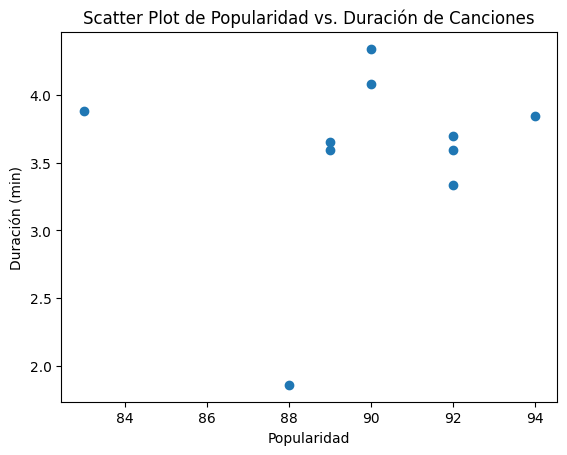

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['Popularidad'], df['Duración (min)'])

# Etiqueta los ejes y da un título al gráfico
plt.xlabel('Popularidad')
plt.ylabel('Duración (min)')
plt.title('Scatter Plot de Popularidad vs. Duración de Canciones')

# Muestra el gráfico
plt.show()